In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_sanction_train.csv')

In [3]:
df.head()
df = df.drop('Loan_ID' , axis=1)

In [4]:
df.head()
df.describe()
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

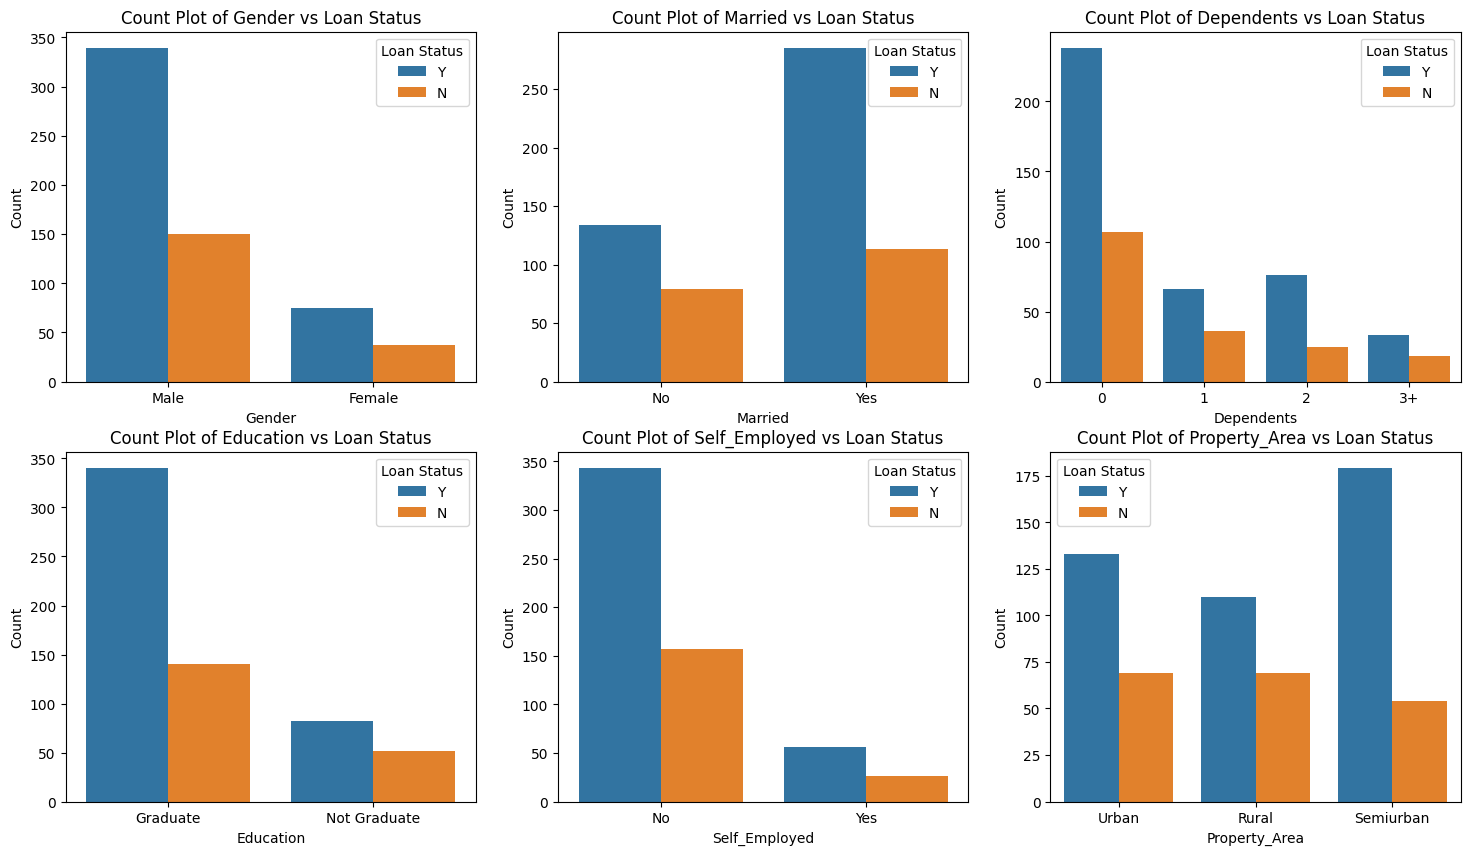

In [5]:
categorical_variables = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# Iterate through each categorical variable and create count plot
for i, cat_var in enumerate(categorical_variables):
    sns.countplot(x=cat_var, hue='Loan_Status', data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {cat_var} vs Loan Status')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Loan Status')

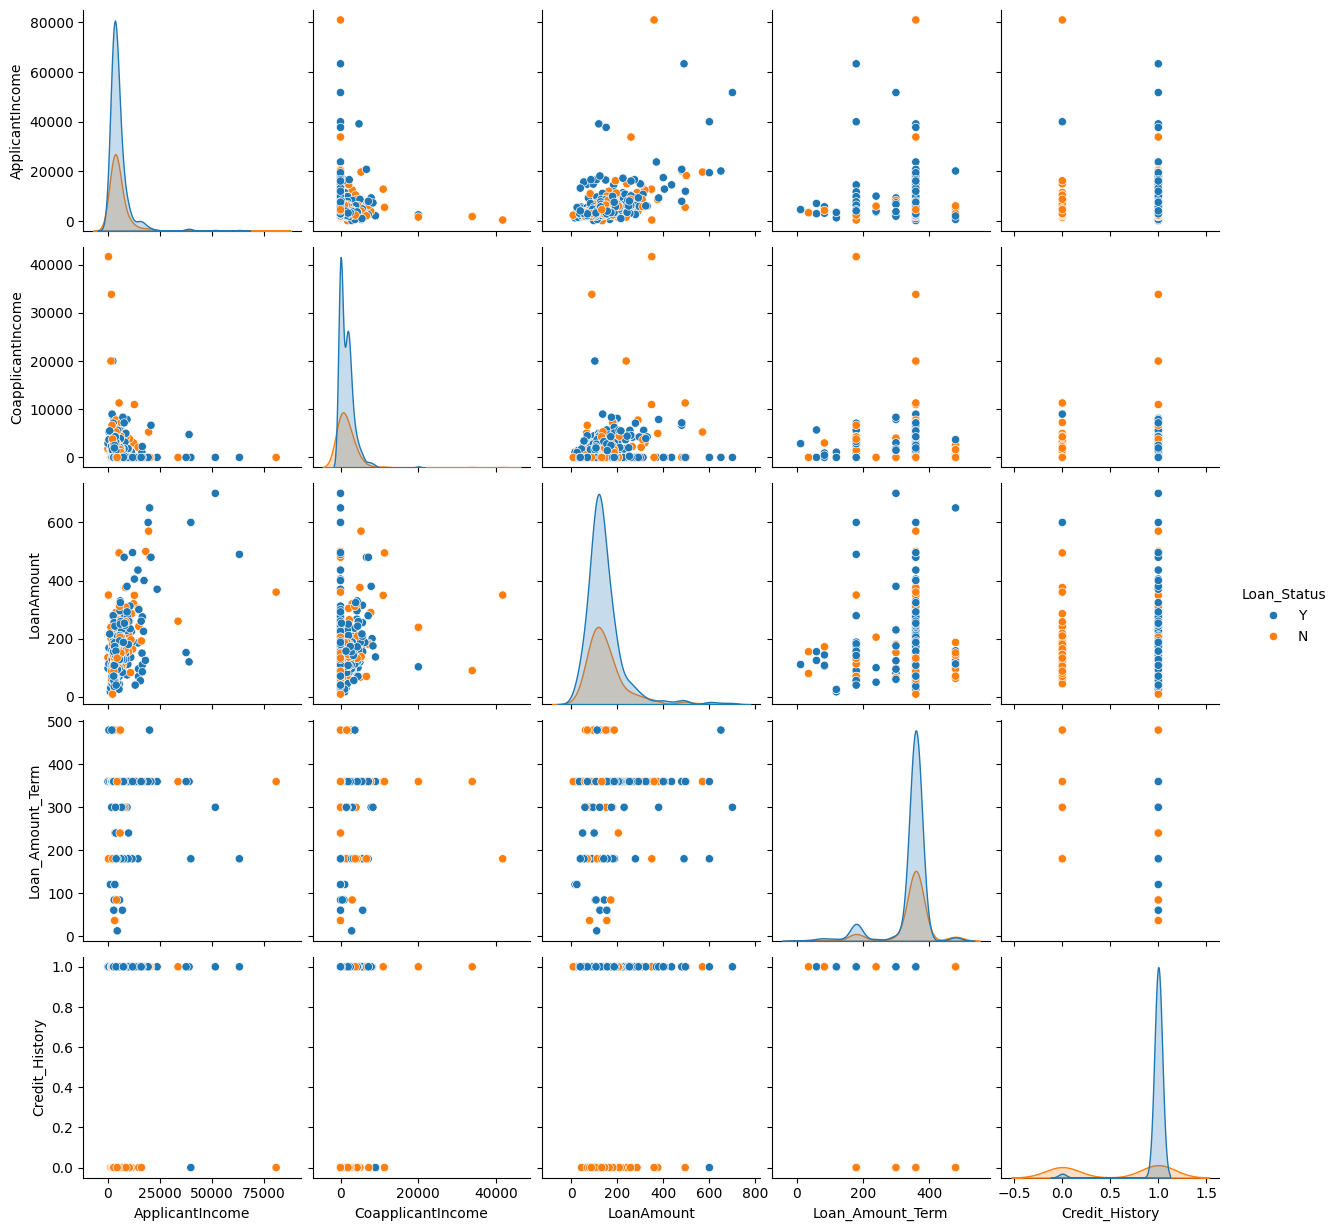

In [6]:
sns.pairplot(data=df,hue="Loan_Status")

<h3><mark>Handling missing values</mark></h3>

In [7]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<h3>if Dependents is null then set it to 0</h3>

In [8]:
df['Dependents'] = df['Dependents'].fillna('0');

<h3>if Self Employed is null set it to No</h3>

In [9]:
df['Self_Employed'] = df['Self_Employed'].fillna('No');

<h3>Dropping null values from Gender, Loan amnt, Loan amnt term, Credit History</h3>

In [10]:
df.dropna(subset=["Gender", "LoanAmount", "Loan_Amount_Term", "Credit_History" , "Married"], inplace=True)

<h3><mark>Outliers</mark></h3>

<Axes: ylabel='LoanAmount'>

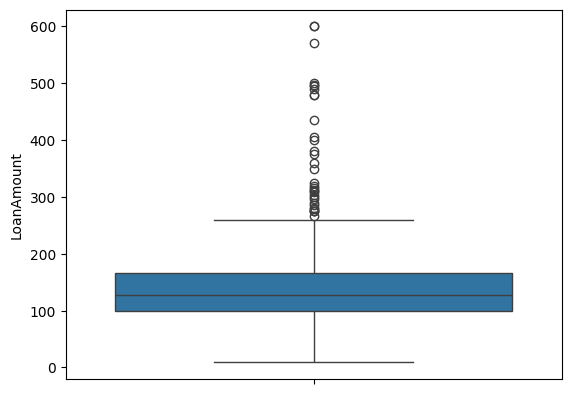

In [11]:
sns.boxplot(data=df,y='LoanAmount')

In [12]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

len(df[(df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound)])

33

In [13]:
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

<h3><mark>Converting the binary categorical data in boolean format</mark></h3>

In [14]:
print(df['Gender'].unique())
print(df['Self_Employed'].unique())
print(df['Education'].unique())
print(df['Married'].unique())
print(df['Credit_History'].unique())

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['Yes' 'No']
[1. 0.]


In [15]:
OHE = pd.get_dummies(df[['Gender','Self_Employed','Education','Married','Credit_History']],drop_first=True)

In [16]:
df =  pd.concat([df.drop(columns=['Gender','Self_Employed','Education','Married','Credit_History']),OHE],axis=1)

In [17]:
OHE = pd.get_dummies(df[['Dependents','Property_Area']])

In [18]:
df =  pd.concat([df.drop(columns=['Dependents','Property_Area']),OHE],axis=1)

In [19]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Gender_Male,Self_Employed_Yes,Education_Not Graduate,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,N,1.0,True,False,False,True,False,True,False,False,True,False,False
2,3000,0.0,66.0,360.0,Y,1.0,True,True,False,True,True,False,False,False,False,False,True
3,2583,2358.0,120.0,360.0,Y,1.0,True,False,True,True,True,False,False,False,False,False,True
4,6000,0.0,141.0,360.0,Y,1.0,True,False,False,False,True,False,False,False,False,False,True
6,2333,1516.0,95.0,360.0,Y,1.0,True,False,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,Y,1.0,False,False,False,False,True,False,False,False,True,False,False
610,4106,0.0,40.0,180.0,Y,1.0,True,False,False,True,False,False,False,True,True,False,False
611,8072,240.0,253.0,360.0,Y,1.0,True,False,False,True,False,True,False,False,False,False,True
612,7583,0.0,187.0,360.0,Y,1.0,True,False,False,True,False,False,True,False,False,False,True


In [20]:
df.to_csv('final_loan_sansaction.csv')